In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import torch

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame({
    'Sepal length':iris.data[:,0],
    'Sepal width':iris.data[:,1],
    'Petal length':iris.data[:,2],
    'Petal width':iris.data[:,3],
    'class':iris.target
})

In [4]:
iris_data
# iris dataset link: https://github.com/dotnet/machinelearning/blob/main/test/data/iris.txt
# class 0 = Iris-setosa
# class 1 = Iris-versicolor
# calss 2 = Iris-virginica

,Sepal length,Sepal width,Petal length,Petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


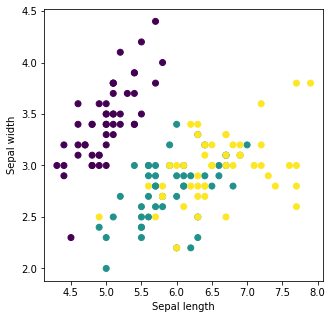

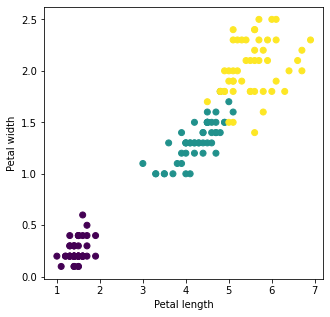

In [5]:
plt.figure(figsize=(5,5))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(iris_data['Sepal length'],iris_data['Sepal width'],c=iris.target)

plt.figure(figsize=(5,5))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(iris_data['Petal length'],iris_data['Petal width'],c=iris.target)


In [6]:
def knn(a,b,k,choose):
  sepal_l = torch.tensor(iris_data['Sepal length'].values)
  sepal_w = torch.tensor(iris_data['Sepal width'].values)
  petal_l = torch.tensor(iris_data['Petal length'].values)
  petal_w = torch.tensor(iris_data['Petal width'].values)
  if(choose == (1,1,0,0)):
    data = torch.cat((sepal_l, sepal_w),0)
    fig = plt.figure(figsize=(5,5))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.plot(a,b, marker="*", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.scatter(iris_data['Sepal length'],iris_data['Sepal width'],c=iris.target)
    plt.show()
  if(choose == (1,0,1,0)):
    data = torch.cat((sepal_l,petal_l),0)
    fig = plt.figure(figsize=(5,5))
    plt.xlabel('Sepal length')
    plt.ylabel('Petal length')
    plt.plot(a,b, marker="*", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.scatter(iris_data['Sepal length'],iris_data['Petal length'],c=iris.target)
    plt.show()
  if(choose == (1,0,0,1)):
    data = torch.cat((sepal_l,petal_w),0)
    fig = plt.figure(figsize=(5,5))
    plt.xlabel('Sepal length')
    plt.ylabel('Petal width')
    plt.plot(a,b, marker="*", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.scatter(iris_data['Sepal length'],iris_data['Petal width'],c=iris.target)
    plt.show()
  if(choose == (0,1,1,0)):
    data = torch.cat((sepal_w,petal_l),0)
    fig = plt.figure(figsize=(5,5))
    plt.xlabel('Sepal width')
    plt.ylabel('Petal length')
    plt.plot(a,b, marker="*", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.scatter(iris_data['Sepal width'],iris_data['Petal length'],c=iris.target)
    plt.show()
  if(choose == (0,1,0,1)):
    data = torch.cat((sepal_w,petal_w),0)
    fig = plt.figure(figsize=(5,5))
    plt.xlabel('Sepal width')
    plt.ylabel('Petal width')
    plt.plot(a,b, marker="*", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.scatter(iris_data['Sepal width'],iris_data['Petal width'],c=iris.target)
    plt.show()
  if(choose == (0,0,1,1)):
    data = torch.cat((petal_l,petal_w),0)
    fig = plt.figure(figsize=(5,5))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.plot(a,b, marker="*", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.scatter(iris_data['Petal length'],iris_data['Petal width'],c=iris.target)
    plt.show()


  data = torch.reshape(data, (2,150))
  #print('data:\n',data)

  inputs = torch.tensor([a, b])
  inputs = inputs.repeat(150,1)
  inputs = torch.transpose(inputs, 0, 1)
  #print('input:\n',inputs)
  cal = torch.sub(inputs,data)
  cal = cal.pow(2)
  cal = torch.sum(cal, 0)
  #print('Ans:\n',cal)
  values, indices = torch.topk(cal, k=k,largest=False)
  #print('values:\n',values,'\nindices:\n',indices)

  # class 0 = Iris-setosa
  # class 1 = Iris-versicolor
  # calss 2 = Iris-virginica
  se = 0
  ve = 0
  vi = 0
  count = 1
  for i in indices:
    #print("iris_data['class'][i]=",iris_data['class'][i.item()])
       
    if iris_data['class'][i.item()] == 0:
      se+=1;
    if iris_data['class'][i.item()] == 1:
      ve+=1
    if iris_data['class'][i.item()] == 2:
      vi+=1
    count+=1
  

  print('\nKNN with k =',k)
  print('The neighborhood of input are ',se,' Iris-setosa, ',ve,' Iris-versicolor and ',vi,' Iris-virginica',sep='')

  c = 0
  if ve > se:
    c = 1
  if vi > ve:
    c = 2

  if c == 0:
     print('\nPredict: Iris-setosa') 
  elif c == 1:
     print('\nPredict: Iris-versicolor') 
  elif c == 2:
     print('\nPredict: Iris-virginica') 

Choose two parametes : 1.Sepal length  2.Sepal width  3.Petal length  4.Petal width
1 2
Please enter Sepal length: 5.5
Please enter Sepal width: 3.15


---------------------------------------------------------------------------------------------------


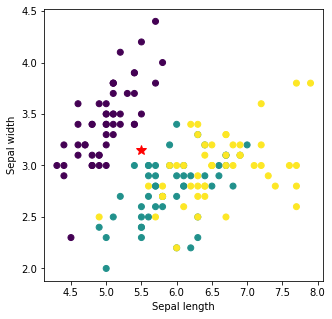


KNN with k = 1
The neighborhood of input are 0 Iris-setosa, 1 Iris-versicolor and 0 Iris-virginica

Predict: Iris-versicolor
---------------------------------------------------------------------------------------------------


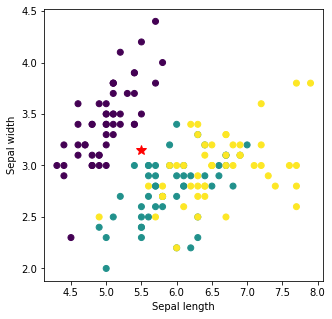


KNN with k = 5
The neighborhood of input are 1 Iris-setosa, 4 Iris-versicolor and 0 Iris-virginica

Predict: Iris-versicolor
---------------------------------------------------------------------------------------------------


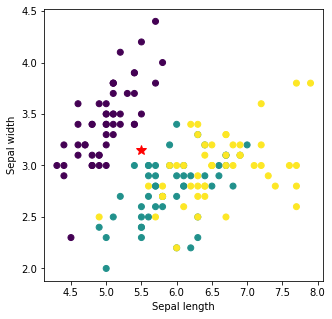


KNN with k = 10
The neighborhood of input are 3 Iris-setosa, 6 Iris-versicolor and 1 Iris-virginica

Predict: Iris-versicolor
---------------------------------------------------------------------------------------------------


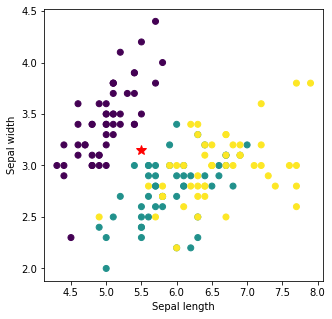


KNN with k = 20
The neighborhood of input are 6 Iris-setosa, 11 Iris-versicolor and 3 Iris-virginica

Predict: Iris-versicolor
---------------------------------------------------------------------------------------------------


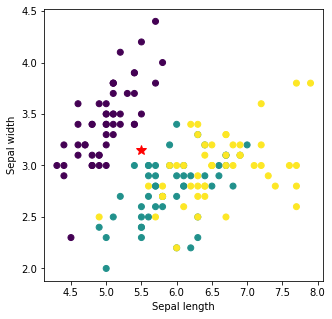


KNN with k = 40
The neighborhood of input are 16 Iris-setosa, 18 Iris-versicolor and 6 Iris-virginica

Predict: Iris-versicolor
---------------------------------------------------------------------------------------------------


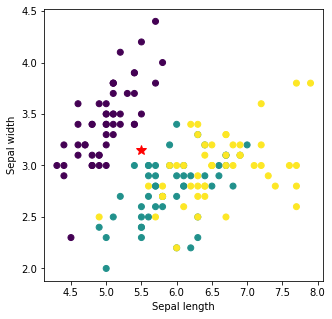


KNN with k = 60
The neighborhood of input are 26 Iris-setosa, 26 Iris-versicolor and 8 Iris-virginica

Predict: Iris-setosa
---------------------------------------------------------------------------------------------------


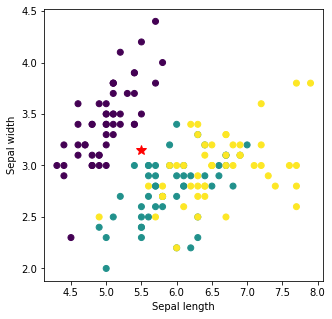


KNN with k = 80
The neighborhood of input are 37 Iris-setosa, 31 Iris-versicolor and 12 Iris-virginica

Predict: Iris-setosa


In [7]:
a,b = map(int,input('Choose two parametes : 1.Sepal length  2.Sepal width  3.Petal length  4.Petal width\n').split())

choose = None
x = None
y = None
if (a==1 and b==2):
  choose = (1,1,0,0)
  x = input('Please enter Sepal length: ')
  y = input('Please enter Sepal width: ')
if (a==1 and b==3):
  choose = (1,0,1,0)
  x = input('Please enter Sepal length: ')
  y = input('Please enter Petal length: ')
if (a==1 and b==4):
  choose = (1,0,0,1)
  x = input('Please enter Sepal length: ')
  y = input('Please enter Petal width: ')
if (a==2 and b==3):
  choose = (0,1,1,0)
  x = input('Please enter Sepal width: ')
  y = input('Please enter Petal length: ')
if (a==2 and b==4):
  choose = (0,1,0,1)
  x = input('Please enter Sepal width: ')
  y = input('Please enter Petal width: ')
if (a==3 and b==4):
  choose = (0,0,1,1)
  x = input('Please enter Petal length: ')
  y = input('Please enter Petal width: ')


print('\n')
for k in [1,5,10,20,40,60,80]:
  print('---------------------------------------------------------------------------------------------------')
  knn(float(x),float(y),k,choose)
  